# Identify hits in batch

Read a CSV file of locations and bearings that were downloaded from Google Street View via gsv_loader.py

One location at a time, display all four images (front, left, right, rear) in the notebook

Provide a function to record hits in an output CSV:  In which images for each location did we see the item of interest?

In [1]:
batch = 'Mount_Eliza_Sample_20m'

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tqdm.notebook import tqdm


# Make sure local modules can be imported
module_path_root = os.path.abspath(os.pardir)
if module_path_root not in sys.path:
    sys.path.append(module_path_root)

batch_filename_path = os.path.join(module_path_root, 'batches', batch + '.csv')
hits_filename_path  = os.path.join(module_path_root, 'batches', batch + '_hits.csv')
download_directory  = os.path.join(module_path_root, 'data_sources', 'gsv')

In [3]:
# Load the batch CSV
df = pd.read_csv(batch_filename_path)

row_i   = 0
row_max = df.shape[0]

In [44]:
def display_row():
    global df
    global row_i
    global row_max
        
    if row_i > row_max - 1:
        print('No more rows to examine')
        return
        
    # Fetch the row
    node_id   = df.iloc[row_i, 0]
    offset_id = df.iloc[row_i, 1]
    lat       = df.iloc[row_i, 2]
    lon       = df.iloc[row_i, 3]
    bearing   = df.iloc[row_i, 4]
        
    print('{0:d} {1:d} {2:d}'.format(row_i, node_id, offset_id))
    
    row_path = os.path.join(download_directory, str(node_id), str(offset_id))
    
    fig = plt.figure(figsize=(20,20))
    
    heading_offsets = [0, 90, 180, 270]
    
    try:
        for idx, heading_offset in enumerate(heading_offsets):
            heading = round(bearing + heading_offset)
            if heading > 360:
                heading = heading - 360
        
            heading_path_jpg = os.path.join(row_path, str(int(heading)), 'gsv_0.jpg')
        
            img = mpimg.imread(heading_path_jpg)

            plt.subplot(2, 2, idx+1)
            plt.imshow(img)
        plt.show()
    except Exception:
        print('File not found: ' + heading_path_jpg)
              
    # Move onto the next one
    return (row_i + 1)

In [256]:
def record_hit(row_id, image_num=0, quality=1):
    node_id   = df.iloc[row_i, 0]
    offset_id = df.iloc[row_i, 1]
    hits = open(hits_filename_path, 'a')
    hits.write(str(node_id) + ',' + str(offset_id) + ',' + str(image_num) + ',' + str(quality) + '\r\n')
    hits.close()

199 458401333 0


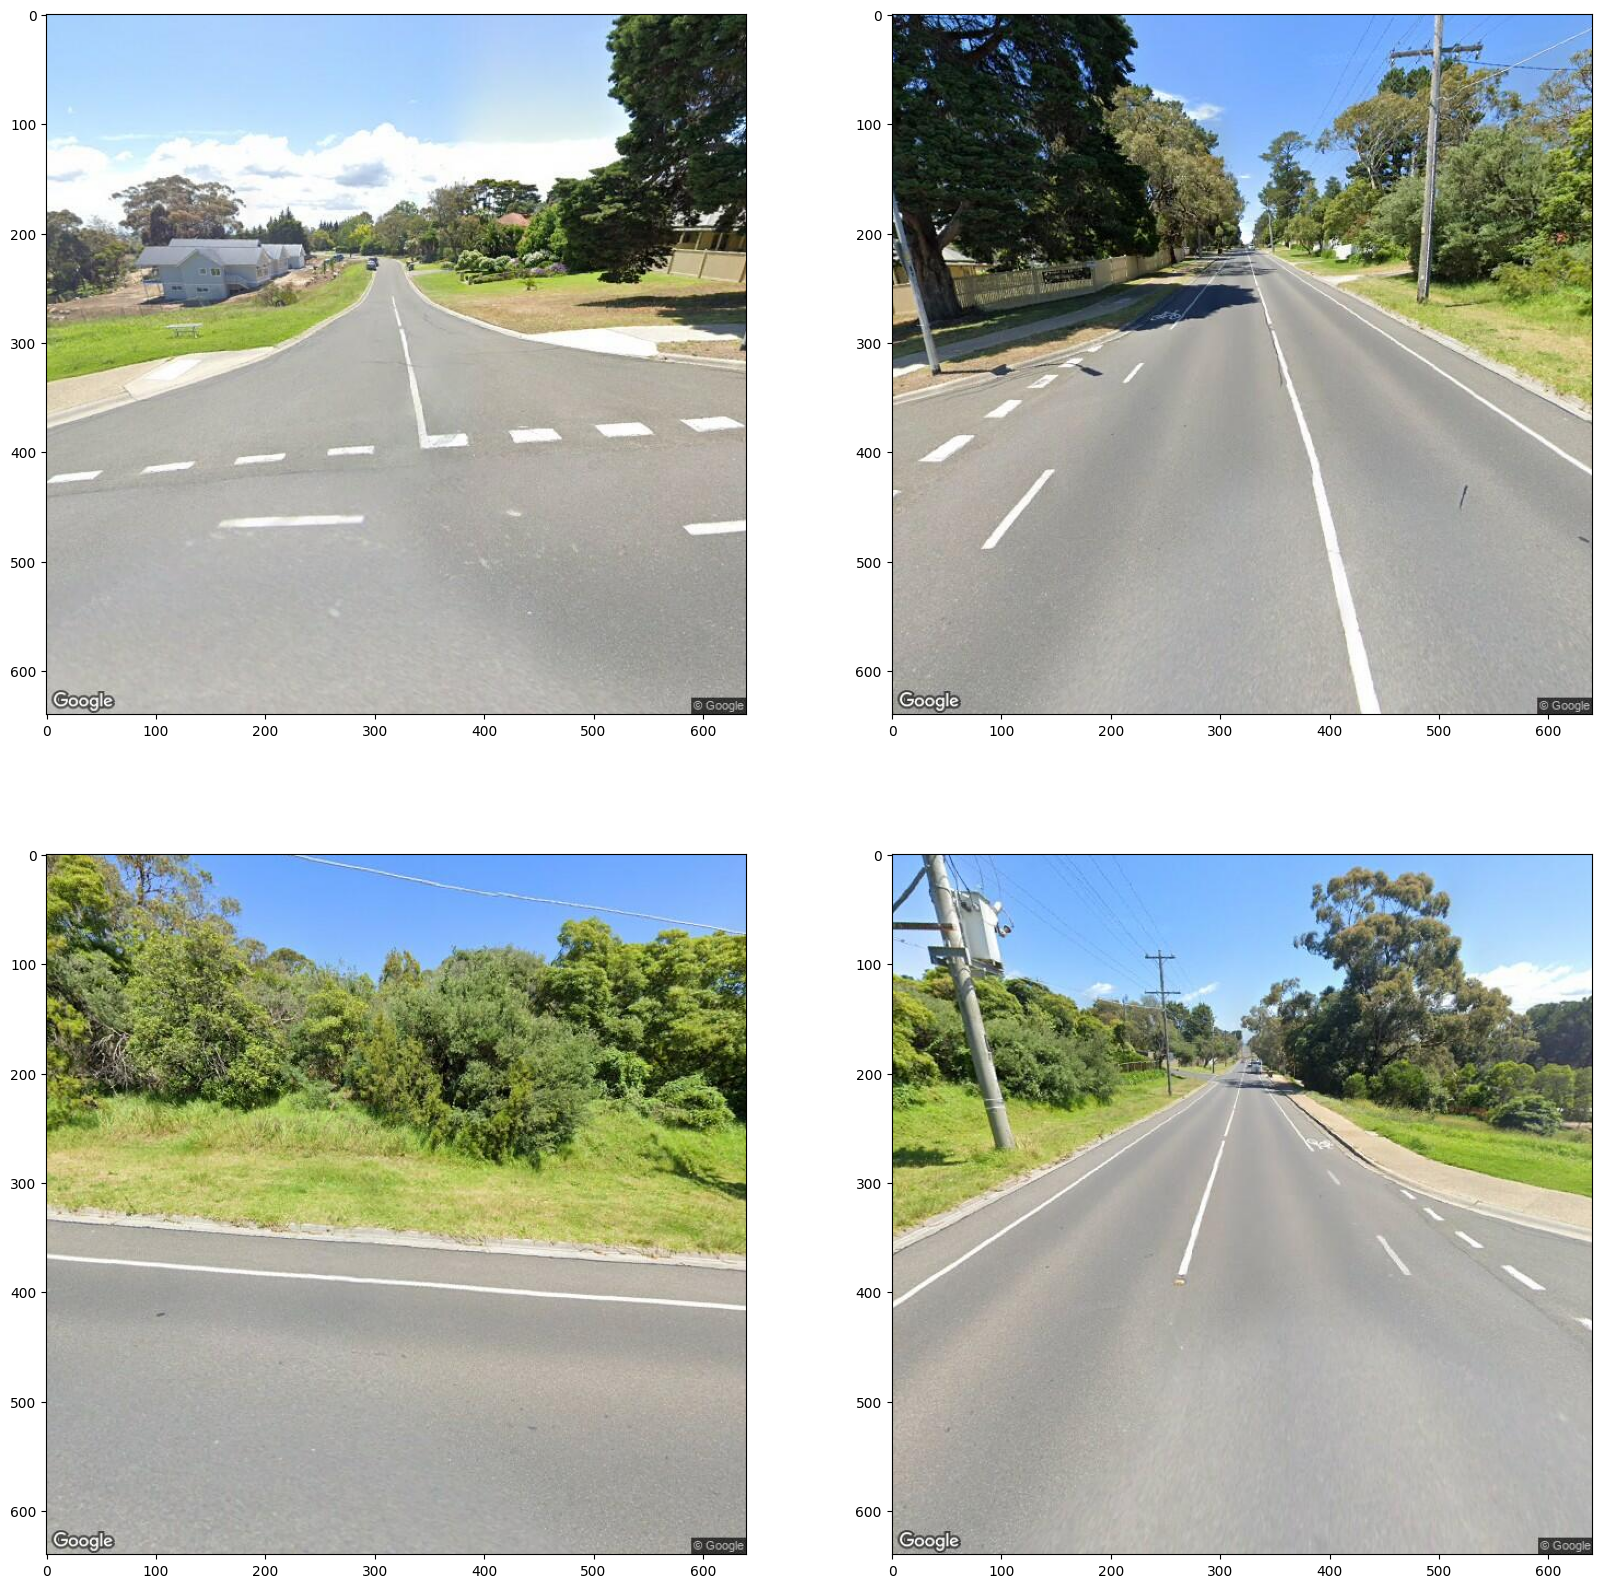

In [1124]:
row_i = display_row()

In [1005]:
record_hit(row_i, 3, 2)

In [1125]:
record_hit(row_i, 3, 1)

In [924]:
row_i = 10